In [43]:
#1-Importar as bibliotecas que serão usadas - Pandas, Seaborn(sns),Matplotlib.pyplot(plt)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np


#Seaborn: construção de gráficos visualmente mais atrativos
#Matplotlib: plota o gráfico
#train_test_split: aplicação de testes, modelo de previsão
#LinearRegression: aplicação de regressão linear
#RandomForestRegressor: aplicação de outro método de regressão
#numpy: cálculo de grande volume de dados

In [44]:
#2-Obtenção da base de dados

df = pd.read_csv(r'C:\Users\Computador\Desktop\Gabriel\Análises, Economia, Finanças, Empreendedorismo, Investimentos e Programação\Programação\Python\Hashtag\advertising.csv')
display (df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [45]:
#3-Formatando a base de dados - Dados faltantes; Dados com valor 0(ZERO) quando deveriam ser valores coerentes; Outliers que não representam bem o histórico e logo não ajudam a criação do modelo; Erros na base; Erros de importação; Etc...

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

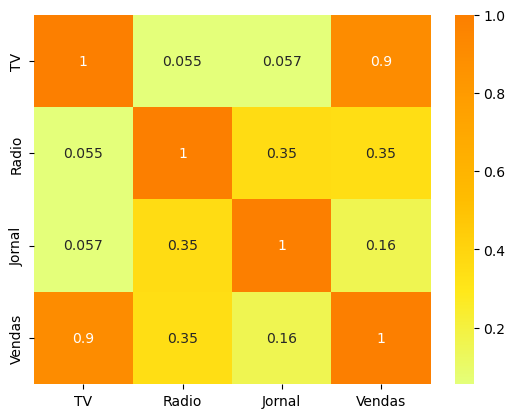

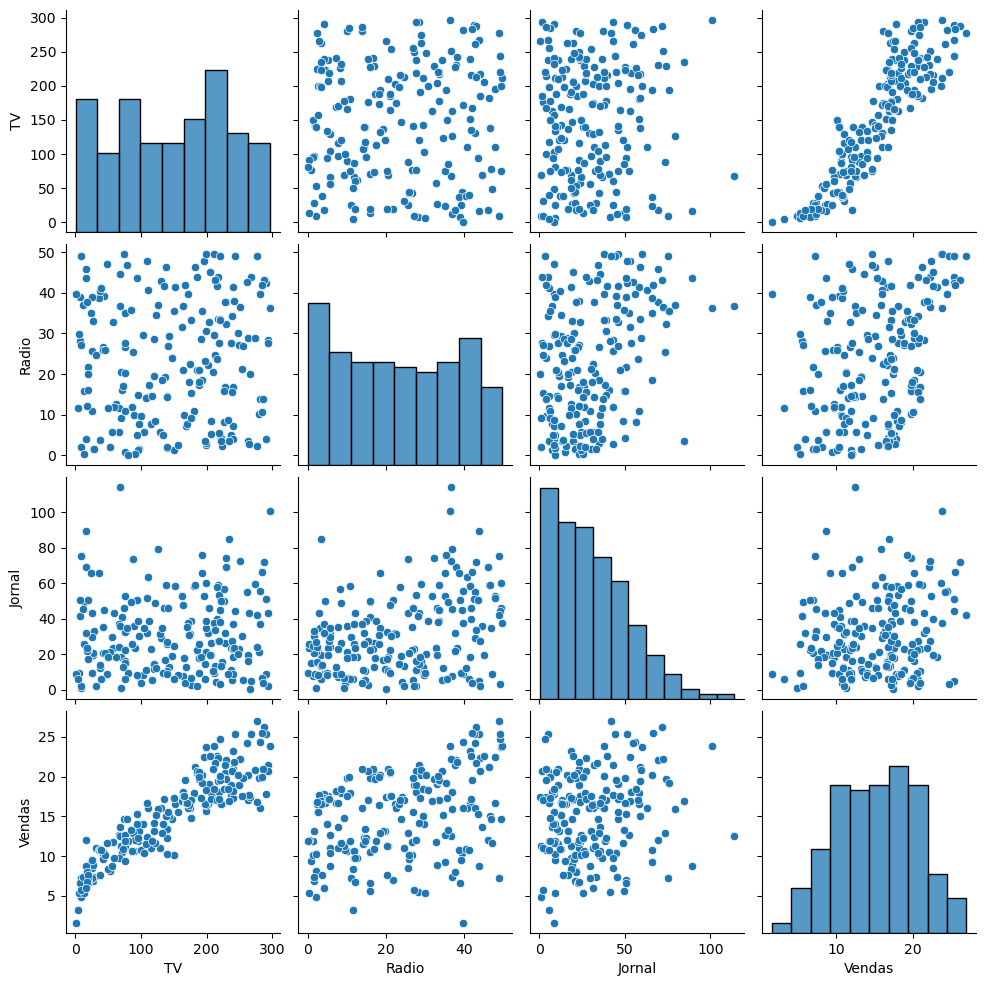

<function matplotlib.pyplot.show(close=None, block=None)>

In [46]:
#4-Análises Gráficas

sns.pairplot (df)
plt.show()

#sns.pairplot (df): Indica o tipo de gráfico da biblioteca seaborn que será utilizado. Os dados base serão utilizados, são os do nosso dataframe df.

sns.heatmap(df.corr(),cmap = 'Wistia', annot = True)
plt.show

#df.corr(): 1º argumento: calcula a correlação e indica que esse é o valor a ser usado no mapa de calor
#cmap = 'Wistia':2º argumento: Indica a paleta de cores a serem usadas no gráfico
#annot = True:3º argumento: Truesignifica que os números devem aparecer dentro dos quadrados do gráfico


In [50]:
#5-Modelagem e Algoritmo

x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

#df.drop('Vendas', axis = 1): Indica que todo o dataframe com exceção da coluna ‘Vendas’ irão compor os valore de X (inputs)
#x/y_train: variável que receberá os dados de treino de x/y
#x/y_test: variável que receberá os dados de x/y
#train_test_split: método que permite a divisão dos dados entre Treino e teste
#x,y:Valores de x e y indicados nas linhas anteriores
#test_size = 0.3: Definição da proporção de dados em teste e treino. Nesse caso 30% serão teste
#random_state = 1: Valor seed do aleatório

#Treino AI - Variáveis de Treino
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

#Teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)
r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R^2 da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")
r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R^2 do Random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rmse_rf}")

#Indicadores das regressões = R^2 e RSME

R^2 da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 1.5396947656031235
R^2 do Random Forest: 0.9654280205621952
RSME do Random Forest: 0.9393432013912704


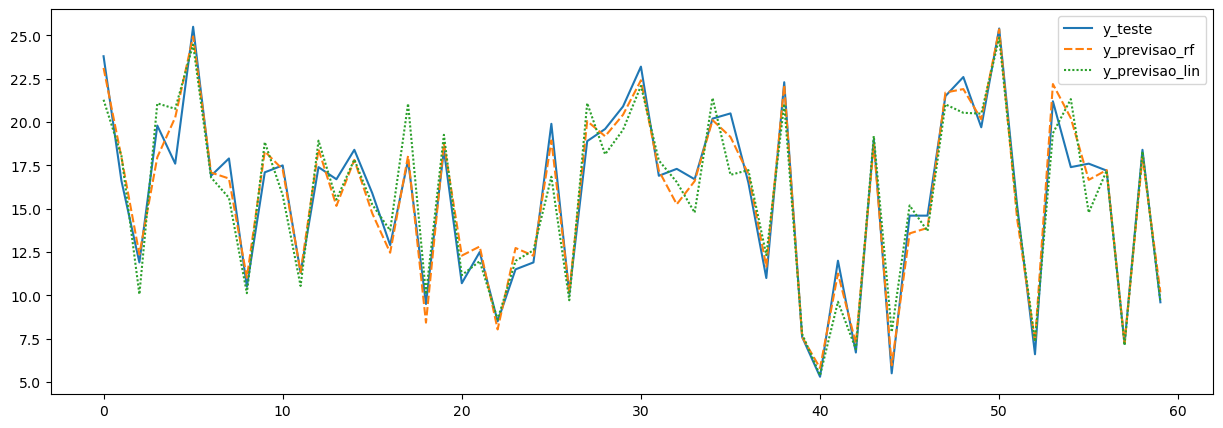

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.126,21.288161
1,16.6,17.955,18.042132
2,11.9,12.366,10.059590
3,19.8,17.972,21.082241
4,17.6,20.267,20.764760
5,25.5,24.943,24.471874
6,16.9,17.087,16.806436
7,17.9,16.743,15.628857
8,10.5,11.018,10.124799
9,17.1,18.306,18.846019


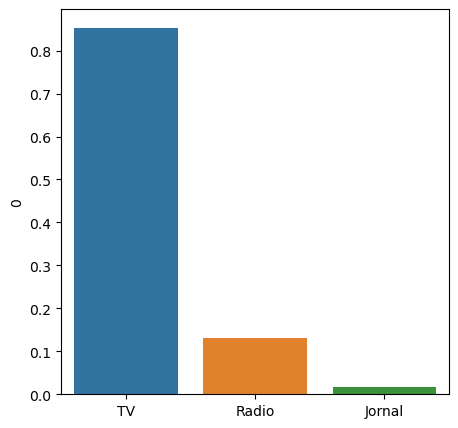

In [53]:
#6-Plotando Gráfico

df_resultado = pd.DataFrame()
#df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

#Comparação dos resultados do modelo com resultados das regressões

importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(5,5))
sns.barplot(x=importancia_features.index, y = importancia_features[0])
plt.show()